In [1]:
import mne
import pandas as pd
from pandas import DataFrame

# set false if you are not using cuda
mne.utils.set_config('MNE_USE_CUDA', 'true')


In [2]:
df: DataFrame = pd.read_csv('../datasets/csv/train-eeg-data.csv')
targets = df['Marker']
df = df.drop('Marker', axis=1)


<Axes: >

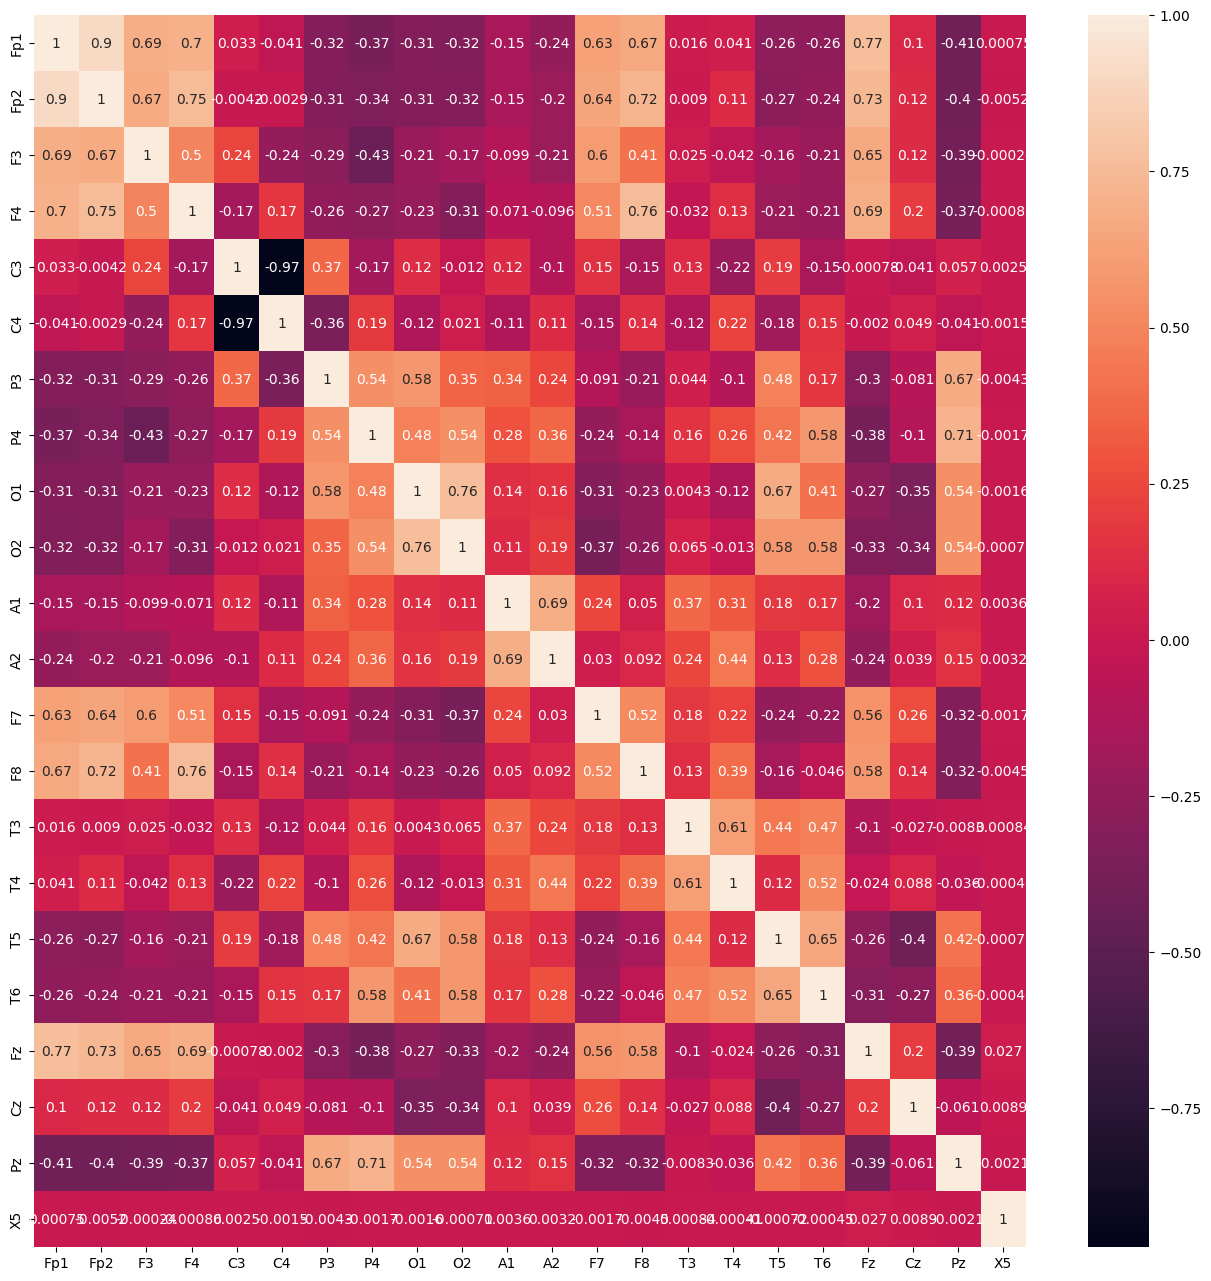

In [8]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
_, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, annot=True, ax=ax)

In [59]:
data = df.transpose().to_numpy()
data

array([[ 14.2 ,  -7.68,  -0.2 , ...,  16.84,  22.05,  21.51],
       [ 17.06,  -2.13, -16.82, ...,  30.87,  23.22,  22.71],
       [-11.42, -15.88, -10.35, ...,  -1.2 ,  -1.1 ,  -0.47],
       ...,
       [  3.96,   2.06,   3.61, ...,  -5.5 ,  -5.81,  -3.09],
       [ -4.32,  -2.07,   4.77, ...,  -2.35,  -3.24,  -2.02],
       [  0.38,   0.16,   0.59, ...,   0.6 ,  -0.06,   0.06]])

In [3]:
# ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6','Fz','Cz','Pz','X5']
ch_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6','Fz','Cz','Pz','X5']
sfreq = 200

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=22, n_times=5600701
    Range : 0 ... 5600700 =      0.000 ... 28003.500 secs
Ready.


Using matplotlib as 2D backend.


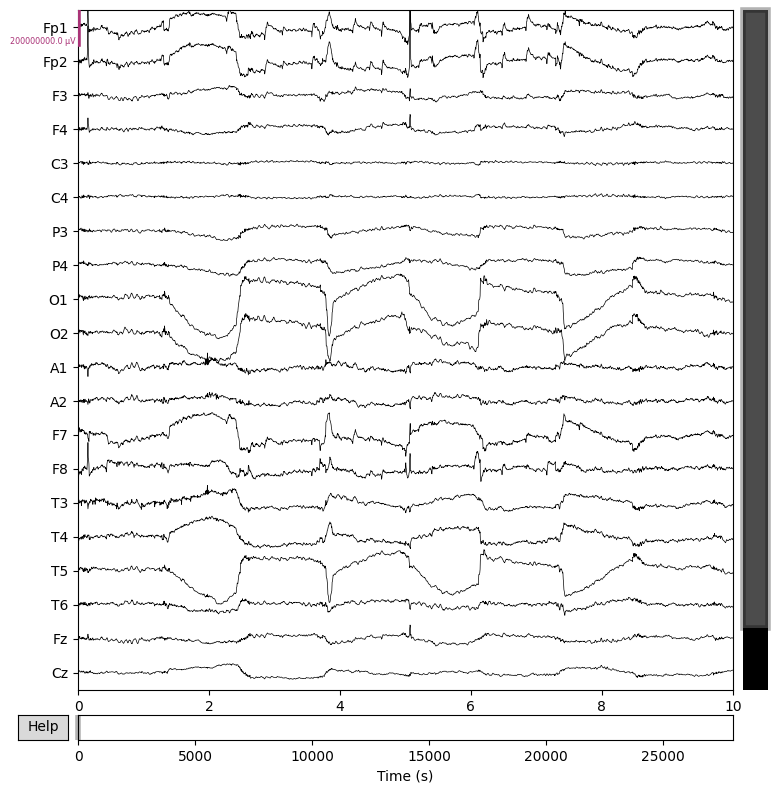

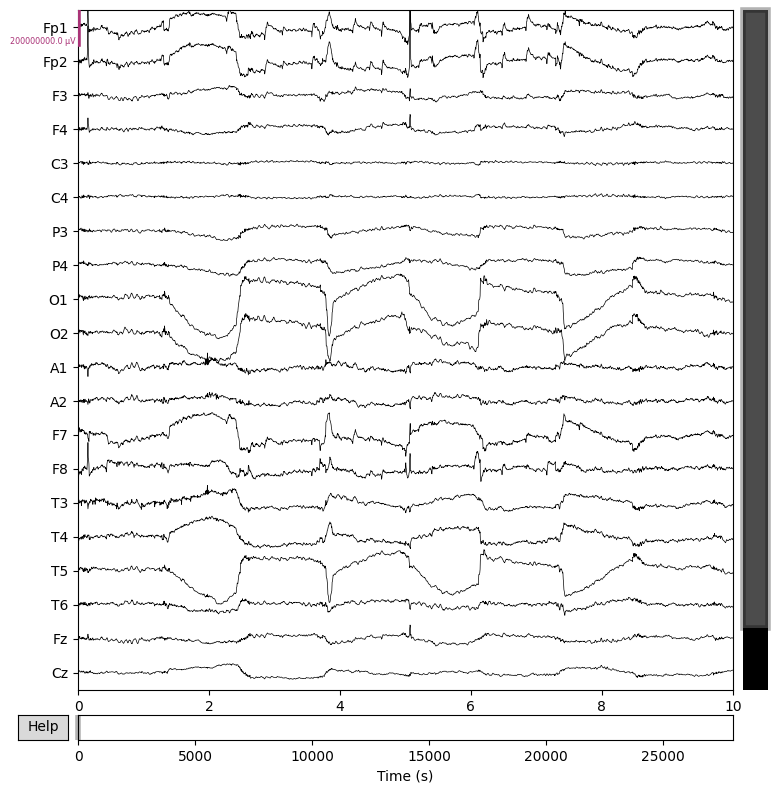

In [4]:
mne.viz.plot_raw(raw, scalings=100)

In [5]:
low_freq, high_freq = 4.0, 40.0 # values in Hz

filtered_data = raw.filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    3.4s finished


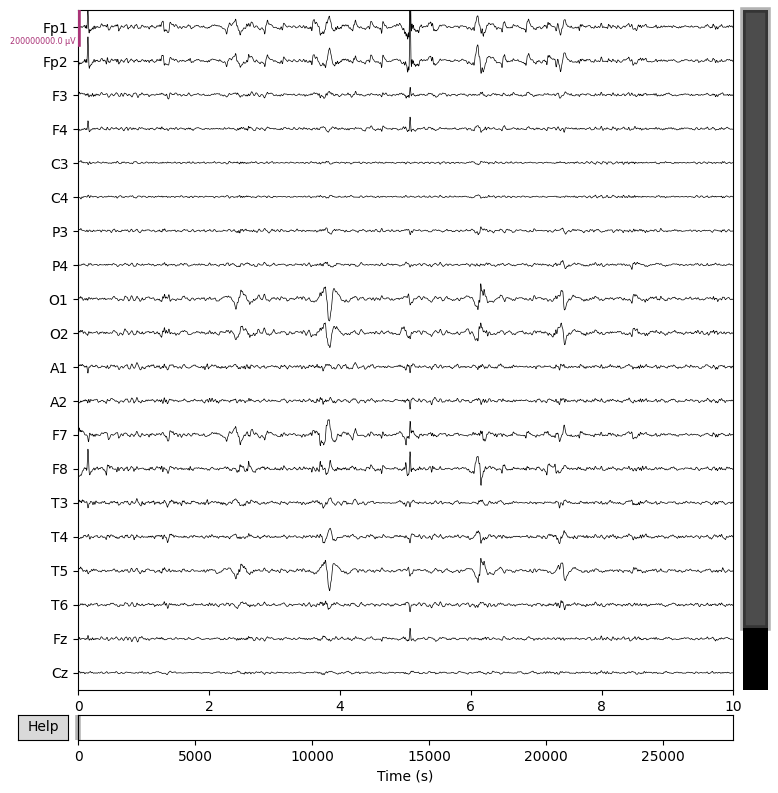

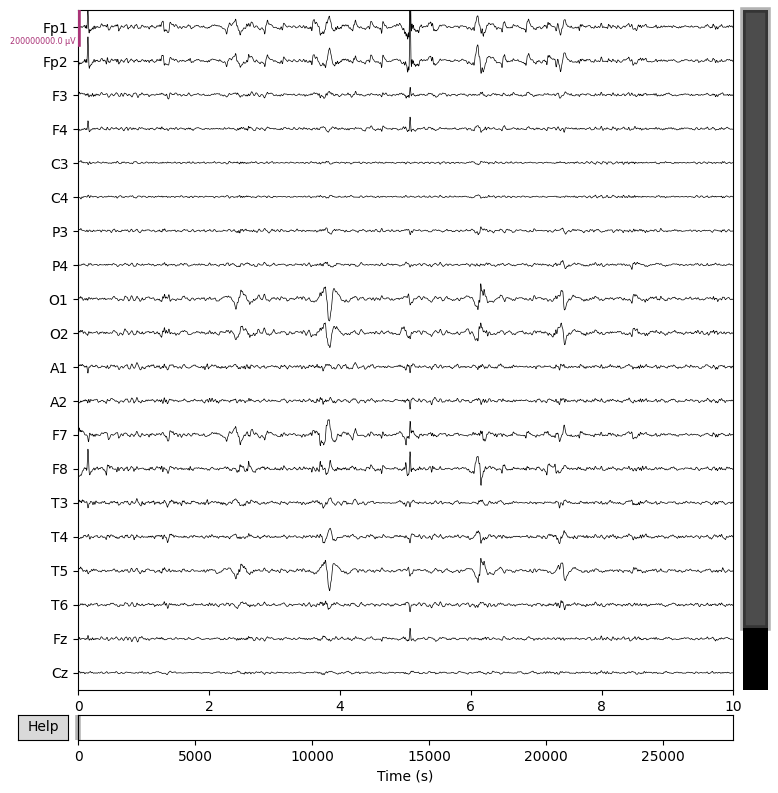

In [6]:
mne.viz.plot_raw(filtered_data, scalings=100)

In [64]:
filtered_t = filtered_data.get_data().transpose()
filtered_t.shape
["Fp1","Fp2","F3","F4","C3","C4","P3","P4","O1","O2","A1","A2","F7","F8","T3","T4","T5","T6","Fz","Cz","Pz","X5"]

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'A1',
 'A2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'X5']

In [65]:
# filtered_df: DataFrame = pd.DataFrame(filtered_t, columns=ch_names)
# filtered_df['Marker'] = targets

# filtered_df.to_csv('../datasets/csv/filtered-train-eeg-data.csv', float_format='%.2f')
# filtered_df.head()

In [ ]:
print('DELTA')
low_freq, high_freq = 0, 4
delta = raw.filter(low_freq, high_freq, n_jobs=4)
mne.viz.plot_raw(delta, scalings='auto')

DELTA
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    3.0s finished


: 

THETA
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    3.4s finished


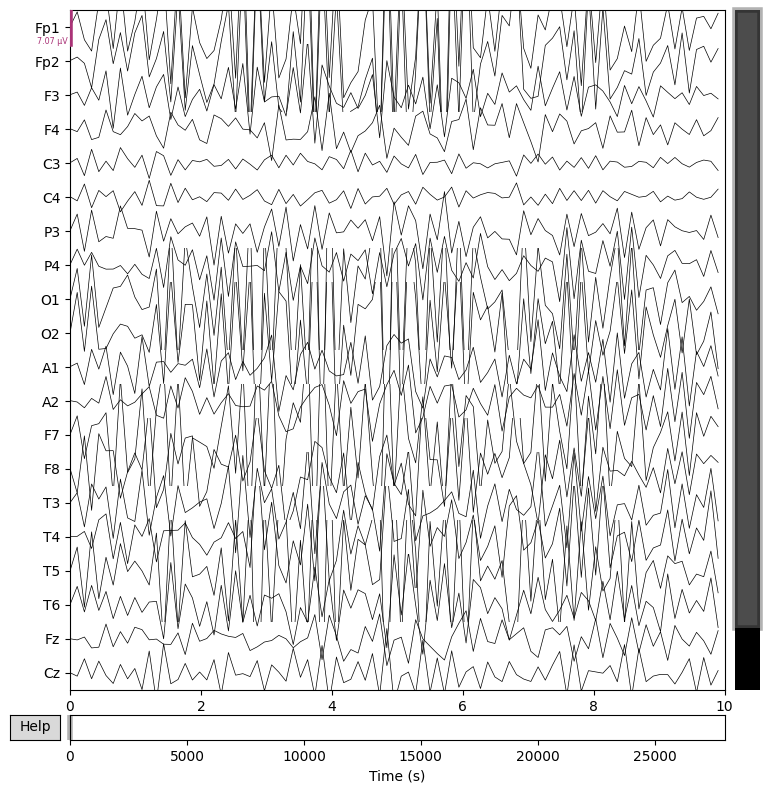

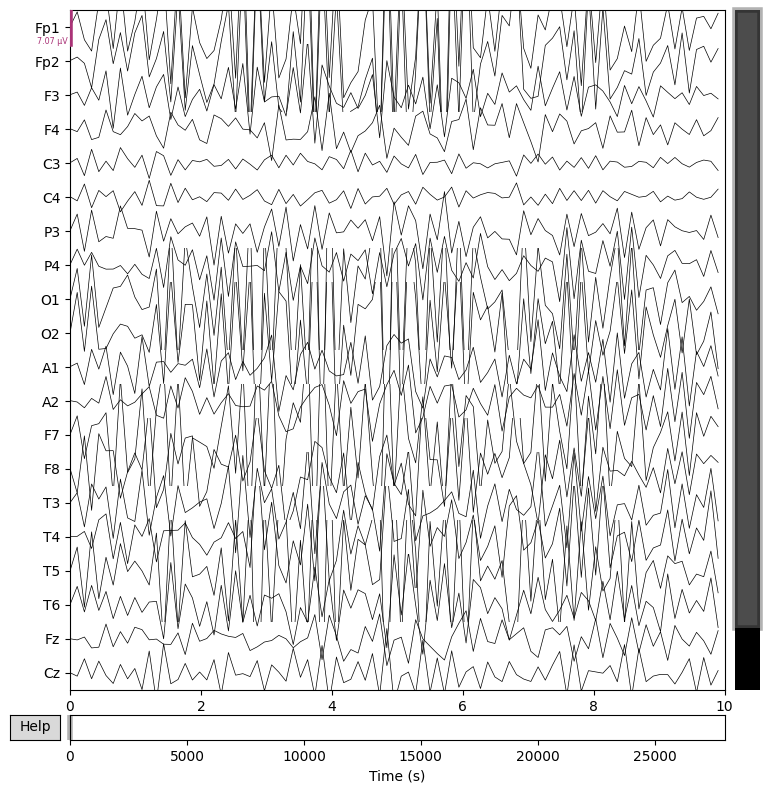

In [11]:
print('THETA')
low_freq, high_freq = 4, 8
theta = raw.filter(low_freq, high_freq, n_jobs=4)
mne.viz.plot_raw(theta, scalings='auto')


ALPHA
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    2.9s finished


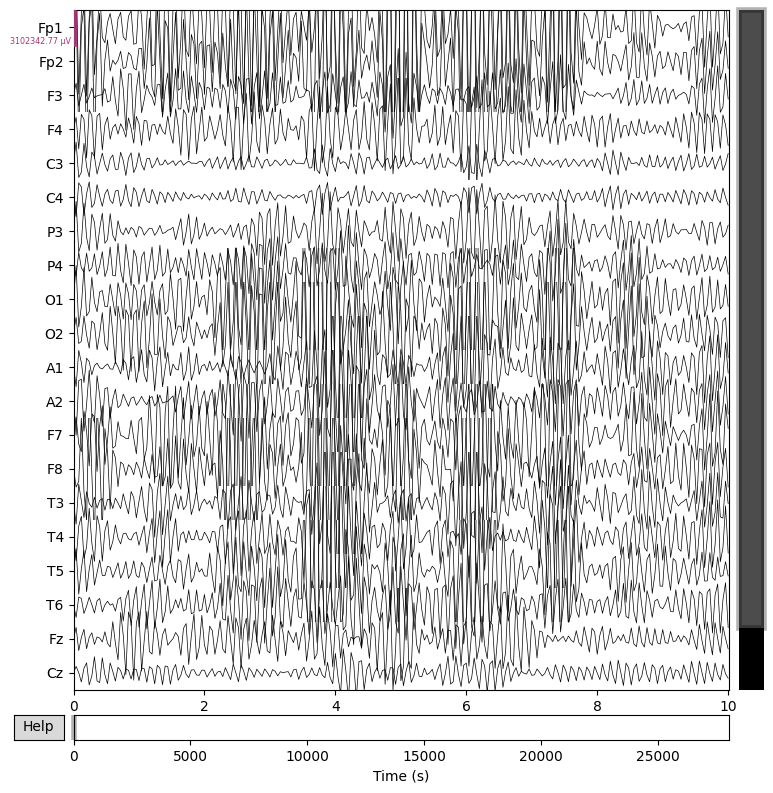

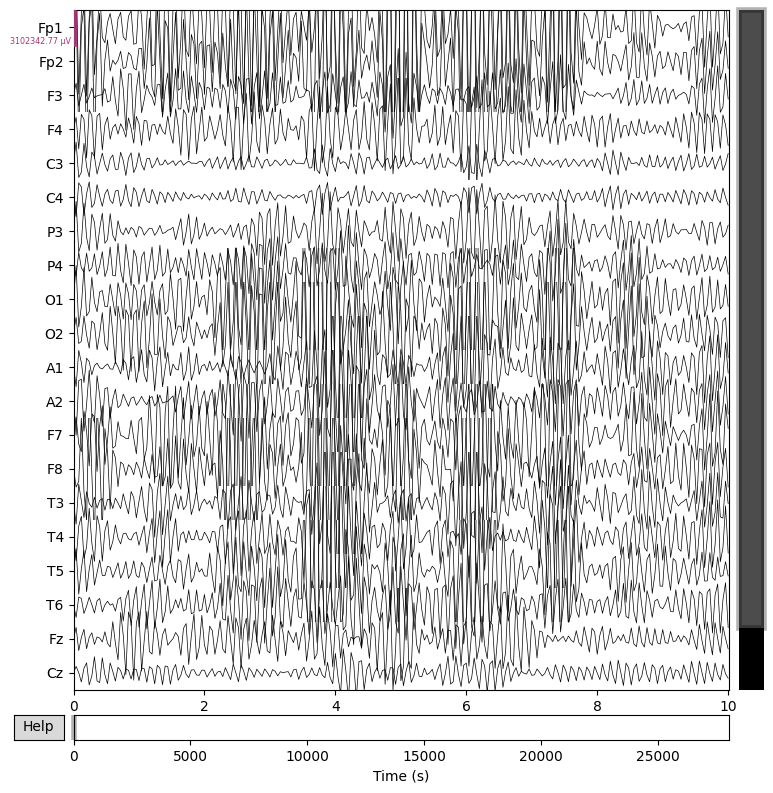

In [8]:
print('ALPHA')
low_freq, high_freq = 8, 12
alpha = raw.filter(low_freq, high_freq, n_jobs=4)
mne.viz.plot_raw(alpha, scalings='auto')

BETA
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    2.9s finished


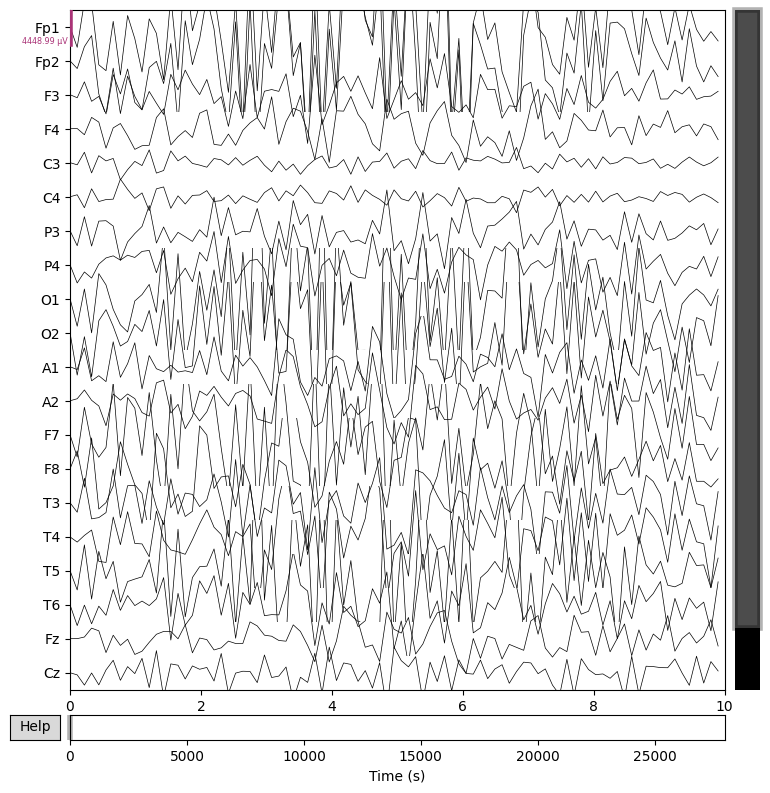

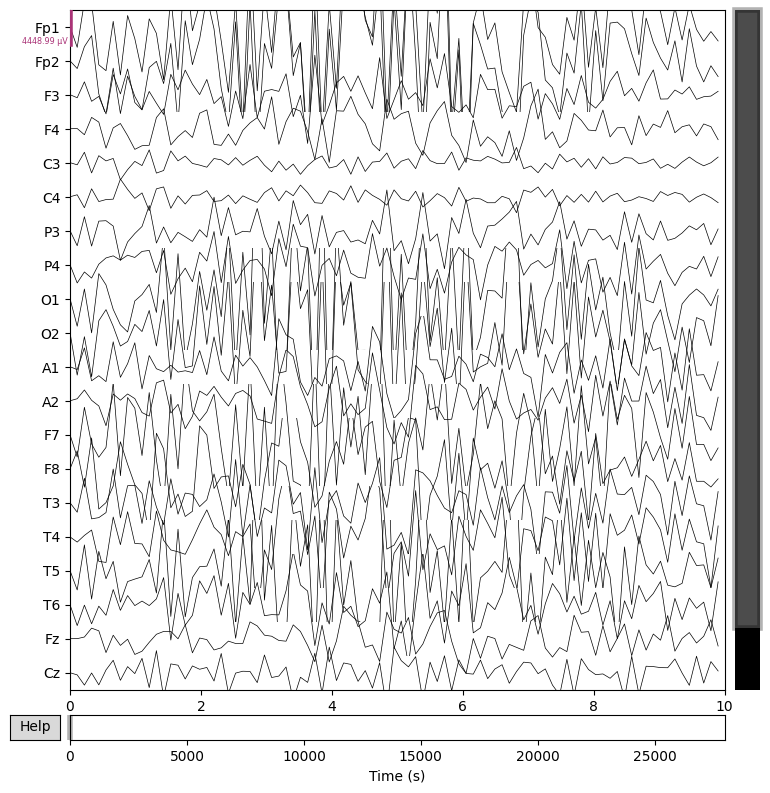

In [9]:
print('BETA')
low_freq, high_freq = 0, 3
beta = raw.filter(low_freq, high_freq, n_jobs=4)
mne.viz.plot_raw(beta, scalings='auto')

GAMMA
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 89 samples (0.445 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    3.1s finished


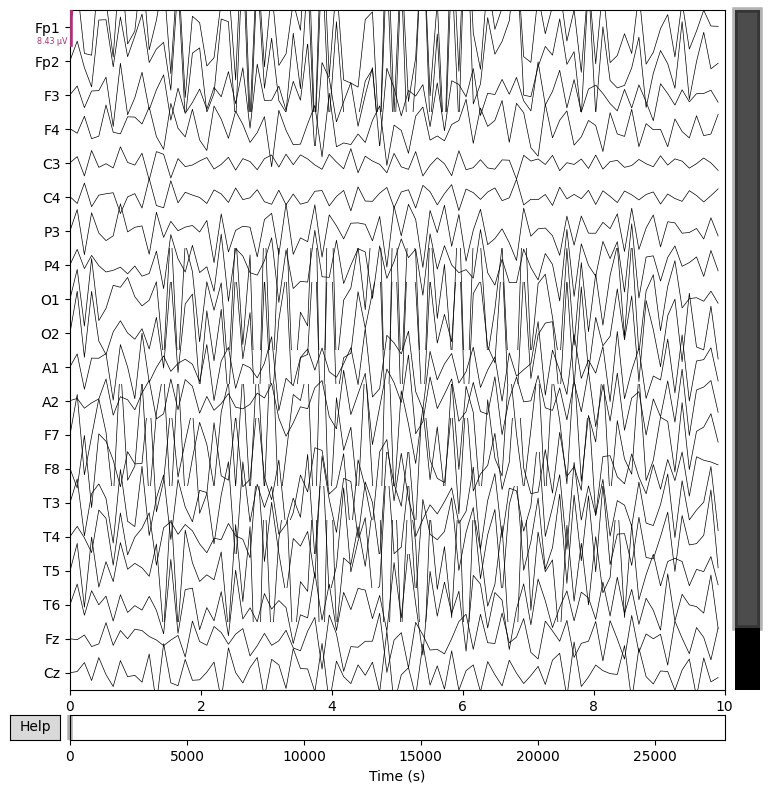

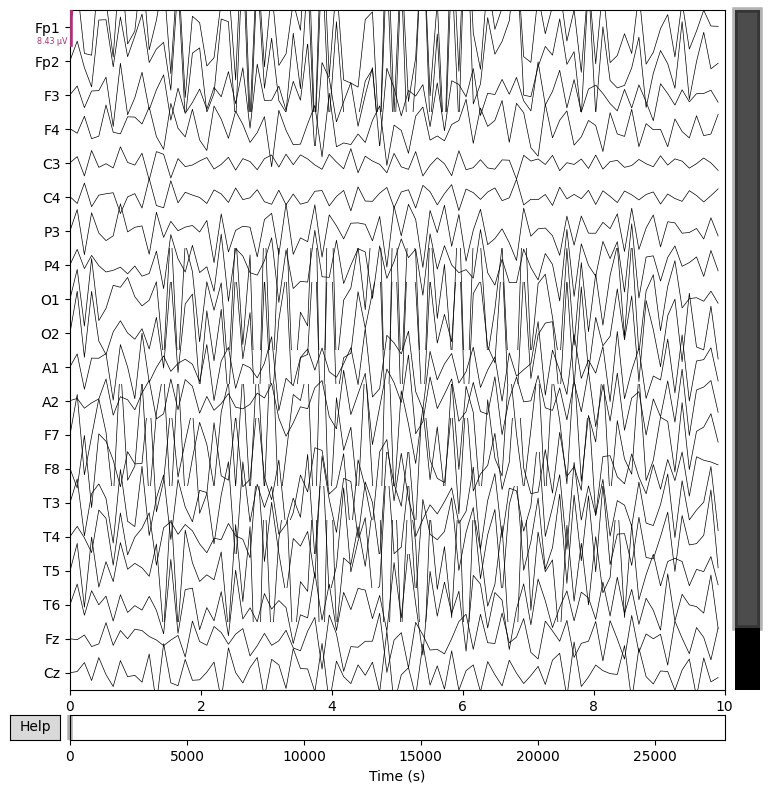

In [10]:
print('GAMMA')
low_freq, high_freq = 30, 45
gamma = raw.filter(low_freq, high_freq, n_jobs=4)
mne.viz.plot_raw(gamma, scalings='auto')

In [ ]:
raw

<RawArray | 22 x 5600701 (28003.5 s), ~940.1 MB, data loaded>